In [ ]:
1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. 
    Lakukan penyesuaian berikut ini.
    Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
    Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
    Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
    Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
    Tampilkanlah histogram dari foto tersebut
    Jelaskan hasil eksperimen anda


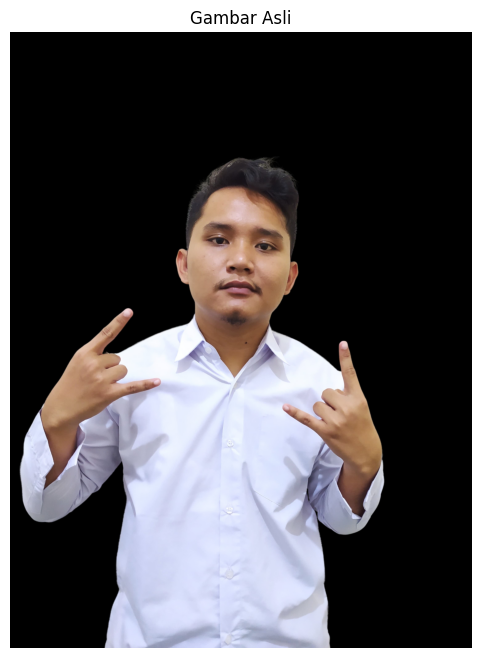

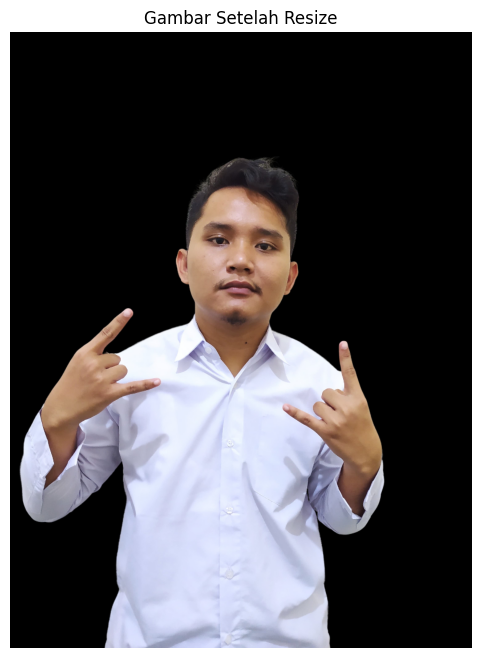

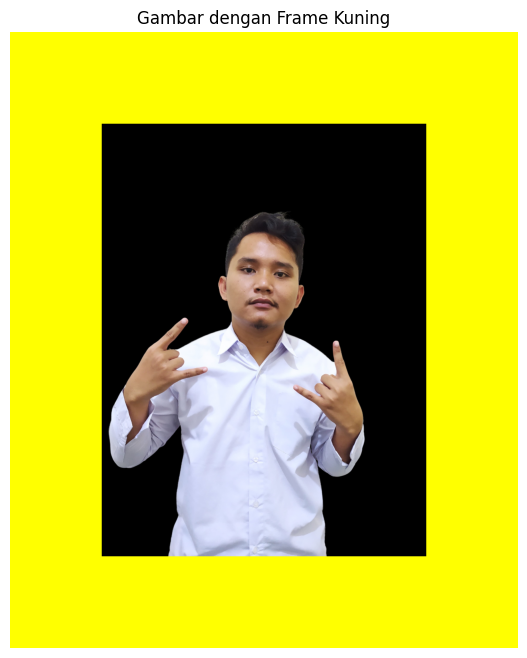

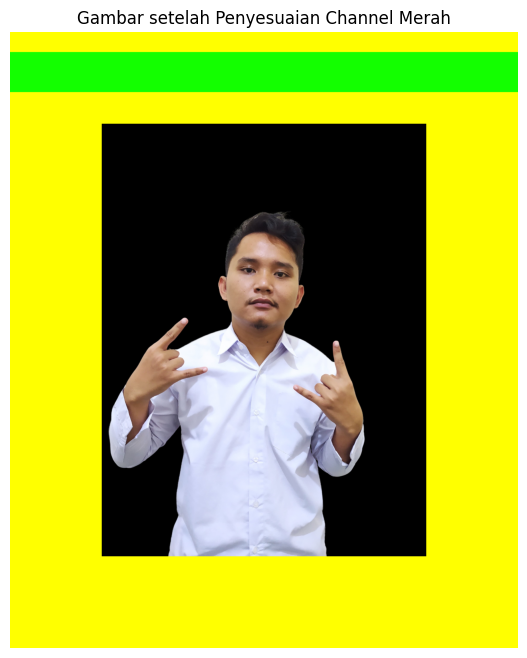

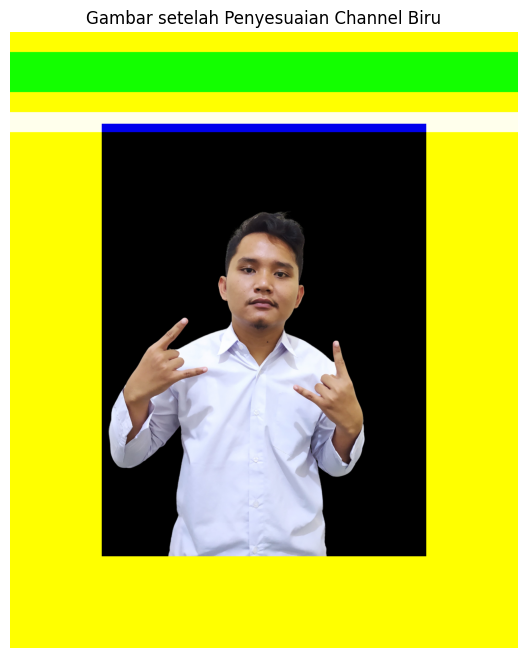

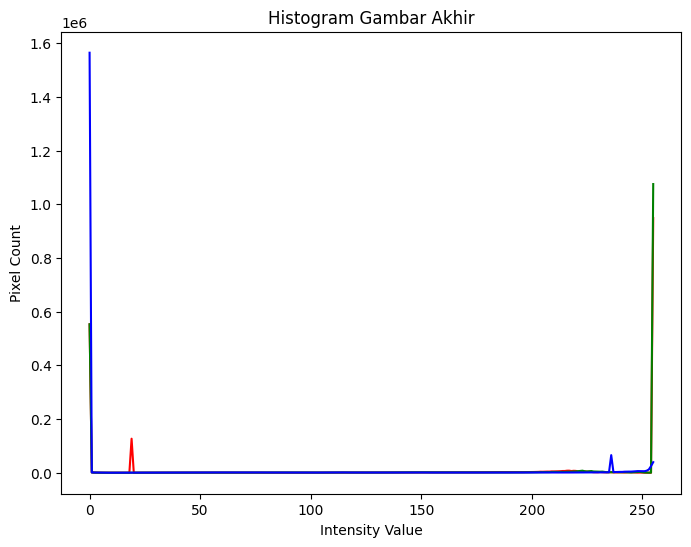

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load gambar asli
image = cv2.imread('foto_eric.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()

# Task 1: Resize gambar
height, width = image.shape[:2]
max_dim = 1080
if height > width:
    new_height = max_dim
    new_width = int((width / height) * max_dim)
else:
    new_width = max_dim
    new_height = int((height / width) * max_dim)
resized_image = cv2.resize(image, (new_width, new_height))

plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.title("Gambar Setelah Resize")
plt.axis('off')
plt.show()

# Task 2: Tambahkan frame kuning
nim_last_two_digits = 204 # nim saya 04 tetapi tidak dapat diproses karena bukan integers (angka) yang valid
padding = 25 + nim_last_two_digits
frame_color = (255, 255, 0)
framed_image = cv2.copyMakeBorder(
    resized_image,
    padding, padding, padding, padding,
    cv2.BORDER_CONSTANT,
    value=frame_color
)

plt.figure(figsize=(8, 8))
plt.imshow(framed_image)
plt.title("Gambar dengan Frame Kuning")
plt.axis('off')
plt.show()

# Task 3: Penyesuaian channel merah
adjusted_red_image = framed_image.copy()
for y in range(50, 150):
    adjusted_red_image[y, :, 0] = np.clip(adjusted_red_image[y, :, 0] + 20, 0, 255)

plt.figure(figsize=(8, 8))
plt.imshow(adjusted_red_image)
plt.title("Gambar setelah Penyesuaian Channel Merah")
plt.axis('off')
plt.show()

# Task 4: Penyesuaian channel biru
adjusted_blue_image = adjusted_red_image.copy()
for y in range(200, 250):
    adjusted_blue_image[y, :, 2] = np.clip(adjusted_blue_image[y, :, 2] - 20, 0, 255)

plt.figure(figsize=(8, 8))
plt.imshow(adjusted_blue_image)
plt.title("Gambar setelah Penyesuaian Channel Biru")
plt.axis('off')
plt.show()

# Task 5: Histogram
colors = ('r', 'g', 'b')
plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    hist = cv2.calcHist([adjusted_blue_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title("Histogram Gambar Akhir")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()


In [ ]:
2. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini

Convert image dari RGB menjadi Grayscale
Tampilkan histogram dari foto tersebut
Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
Tampilkan histogram dari hasil normalisasi
Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

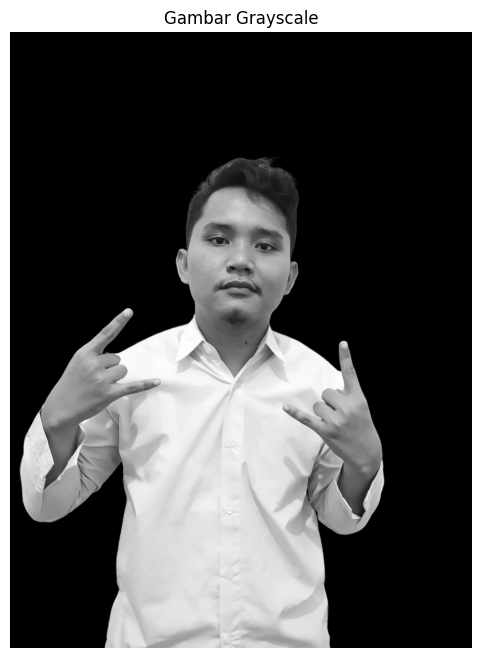

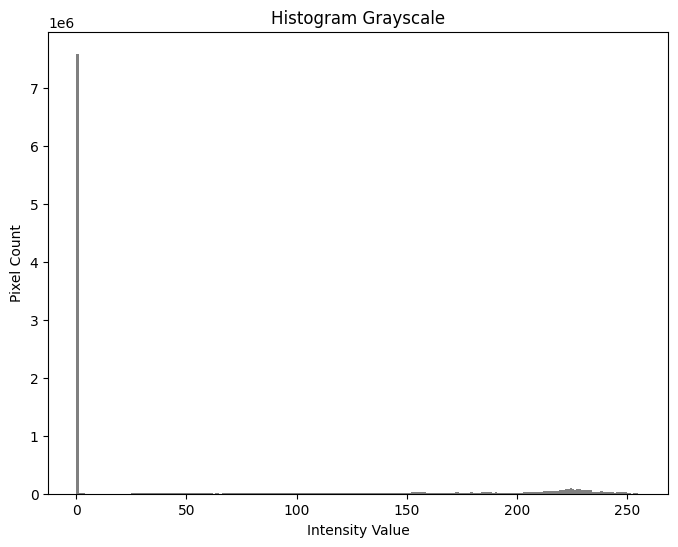

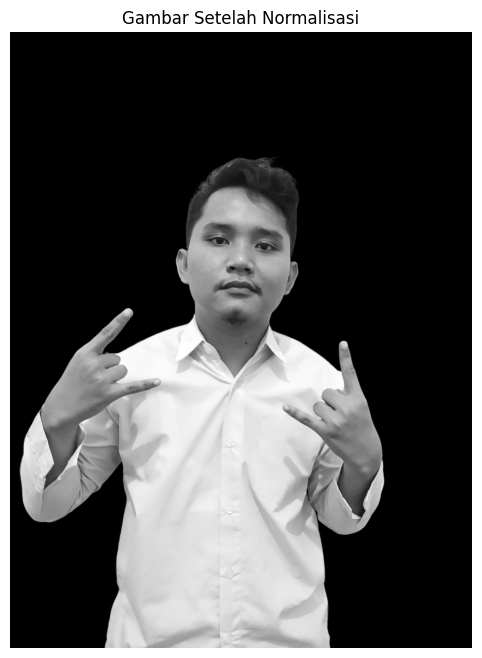

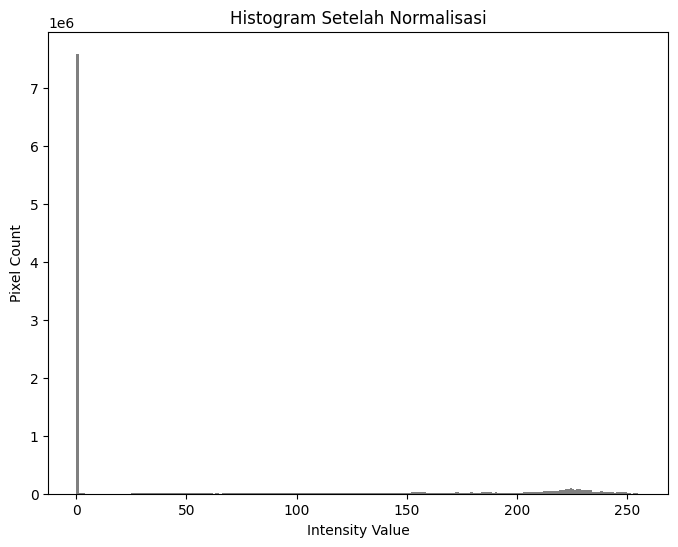

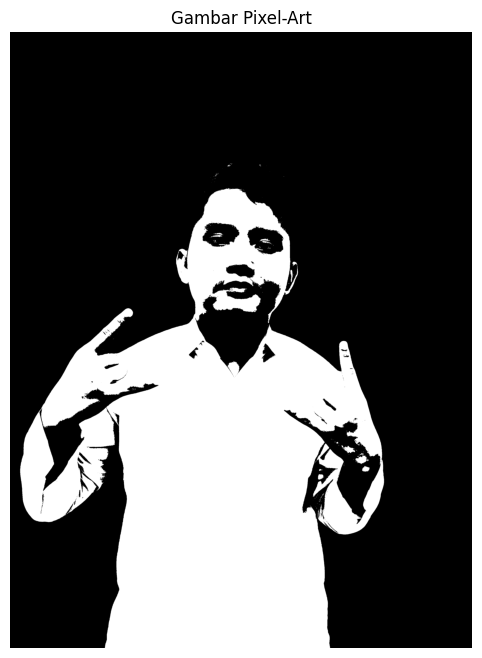

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load gambar asli
image = cv2.imread('foto_eric.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Convert image dari RGB menjadi Grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis('off')
plt.show()

# 2. Histogram gambar grayscale
plt.figure(figsize=(8, 6))
plt.hist(grayscale_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram Grayscale")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

# 3. Normalisasi intensitas warna (0-255)
normalized_image = cv2.normalize(grayscale_image, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(8, 8))
plt.imshow(normalized_image, cmap='gray')
plt.title("Gambar Setelah Normalisasi")
plt.axis('off')
plt.show()

# Histogram gambar setelah normalisasi
plt.figure(figsize=(8, 6))
plt.hist(normalized_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram Setelah Normalisasi")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

# 4. Membuat pixel-art
pixel_art_image = np.where(normalized_image < 128, 0, 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(pixel_art_image, cmap='gray')
plt.title("Gambar Pixel-Art")
plt.axis('off')
plt.show()


In [ ]:
3. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini

    Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
    Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
    Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut

In [ ]:
Menaikkan kecerahan
    Langkah-langkah:

    Representasikan gambar dalam format matriks numpy.
    Tambahkan nilai konstan ke setiap elemen matriks (pixel values).
    Pastikan nilai piksel tetap dalam rentang [0, 255] dengan np.clip.
    Tampilkan histogram untuk melihat distribusi intensitas setelah kecerahan ditingkatkan.

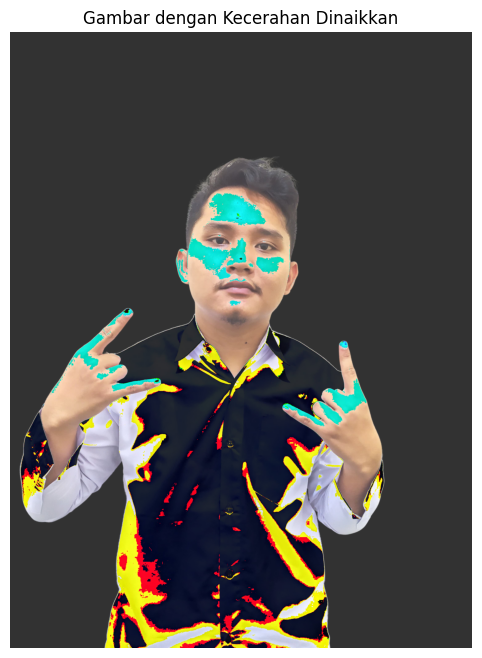

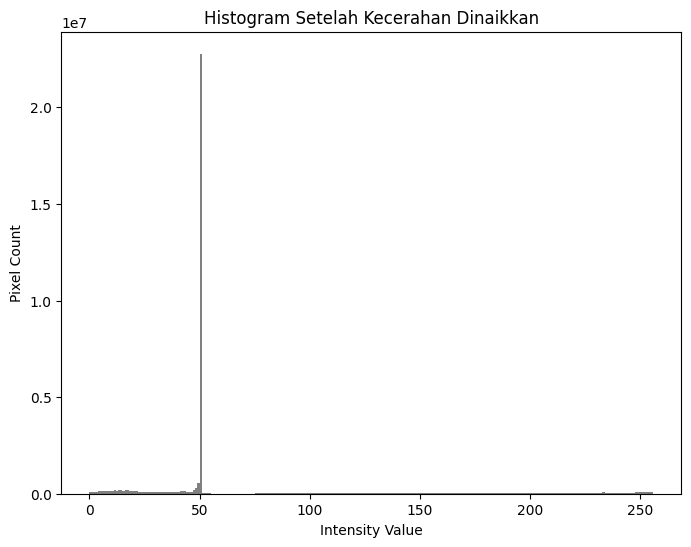

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load gambar asli
image = plt.imread('foto_eric.jpeg')  # Ganti dengan path gambar Anda

# Periksa apakah gambar berada dalam rentang [0, 1], lalu ubah ke [0, 255]
if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)
else:
    image = image.astype(np.uint8)

# Naikkan kecerahan dengan menambahkan nilai konstan
brightness_value = 50  # Nilai kecerahan yang ingin ditambahkan
bright_image = np.clip(image + brightness_value, 0, 255).astype(np.uint8)

# Tampilkan hasil dan histogram
plt.figure(figsize=(8, 8))
plt.imshow(bright_image)
plt.title("Gambar dengan Kecerahan Dinaikkan")
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(bright_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram Setelah Kecerahan Dinaikkan")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()


In [ ]:
Menurunkan saturasi
    Langkah-langkah:
    Representasikan gambar dalam format matriks numpy.
    Hitung rata-rata nilai R, G, dan B untuk setiap piksel (grayscale value).
    Campurkan nilai grayscale dengan warna asli menggunakan faktor saturasi.
    Pastikan nilai tetap dalam rentang [0, 255].

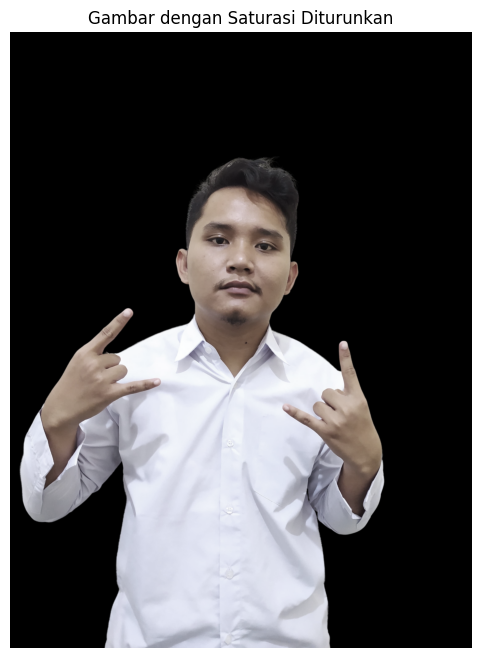

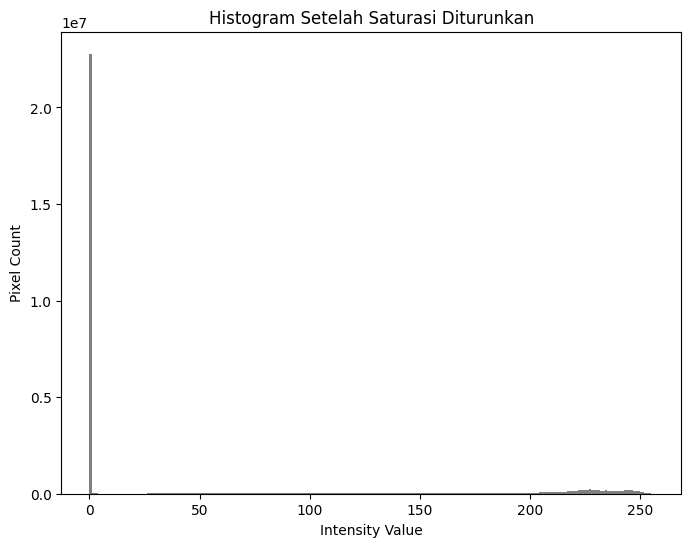

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load gambar asli
image = plt.imread('foto_eric.jpeg')  # Ganti dengan path gambar Anda

# Turunkan saturasi
saturation_factor = 0.5  # Ganti sesuai kebutuhan (0 = grayscale, 1 = warna asli)
gray_image = np.mean(image, axis=2, keepdims=True)
desaturated_image = (saturation_factor * image + (1 - saturation_factor) * gray_image).astype(np.uint8)

# Tampilkan hasil dan histogram
plt.figure(figsize=(8, 8))
plt.imshow(desaturated_image)
plt.title("Gambar dengan Saturasi Diturunkan")
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(desaturated_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram Setelah Saturasi Diturunkan")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()


In [ ]:
Menurunkan kontras
    Langkah-langkah:

    Hitung nilai rata-rata intensitas warna gambar.
    Gunakan rumus:
    pixel
    =
    128
    +
    factor
    ×
    (
    pixel
    −
    128
    )
    pixel=128+factor×(pixel−128)
    di mana factor adalah pengurang kontras (0 = rata-rata, 1 = asli).
    Pastikan hasil tetap dalam rentang [0, 255].

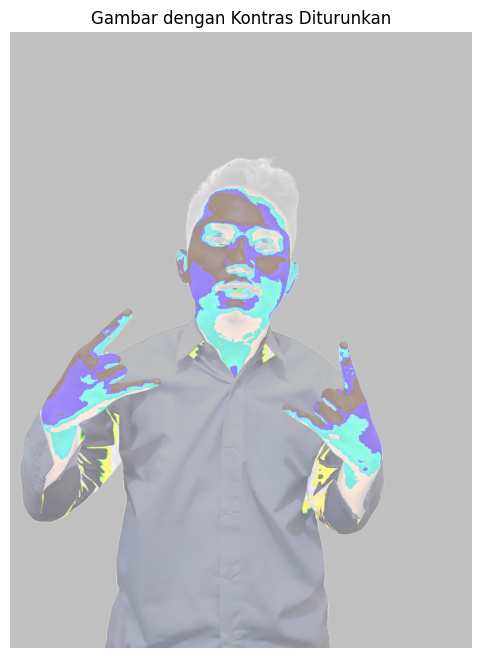

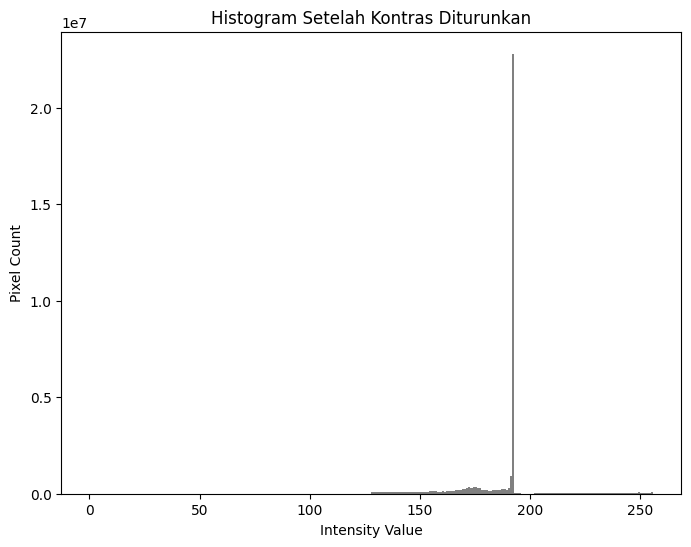

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load gambar asli
image = plt.imread('foto_eric.jpeg')

# Turunkan kontras
contrast_factor = 0.5  # Ganti sesuai kebutuhan (0 = rata-rata, 1 = kontras asli)
mean_intensity = 128
low_contrast_image = np.clip(mean_intensity + contrast_factor * (image - mean_intensity), 0, 255).astype(np.uint8)

# Tampilkan hasil dan histogram
plt.figure(figsize=(8, 8))
plt.imshow(low_contrast_image)
plt.title("Gambar dengan Kontras Diturunkan")
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(low_contrast_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram Setelah Kontras Diturunkan")
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()
